# **Sales Analysis**

**Import Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Retail Dataset**

In [8]:
# Load dataset
df = pd.read_csv("retail_sales_dataset.csv")

# Quick inspection
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

In [10]:
# Check Missing values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

**Feature Engineering**

In [13]:
# Convert date column
df['Date'] = pd.to_datetime(df['Date'])

# Create Revenue column
df['Revenue'] = df['Quantity'] * df['Price per Unit']

**KPI Dashboard**

In [15]:
total_revenue = df['Revenue'].sum()
avg_order_value = df.groupby('Transaction ID')['Revenue'].sum().mean()
top_region = df.groupby('Total Amount')['Revenue'].sum().idxmax()

print("Total Revenue:", total_revenue)
print("Average Order Value:", avg_order_value)
print("Total Amount:", top_region)


Total Revenue: 456000
Average Order Value: 456.0
Total Amount: 2000


**Top Products Analysis**

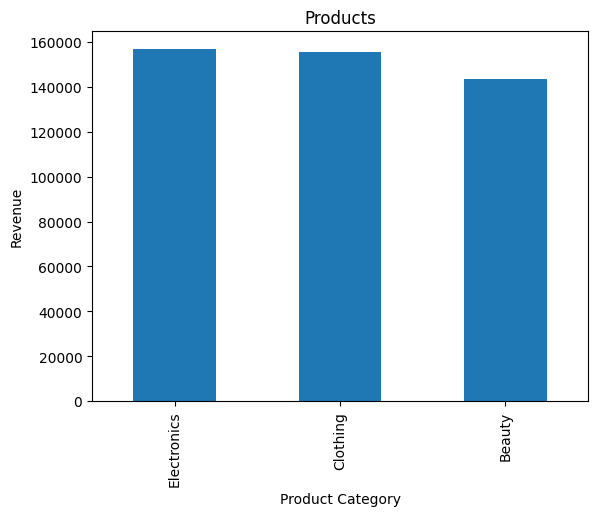

In [19]:
top_products = df.groupby('Product Category')['Revenue'].sum().sort_values(ascending=False).head(5)

top_products.plot(kind='bar', title='Products')
plt.ylabel("Revenue")
plt.show()

**Trend Analysis**

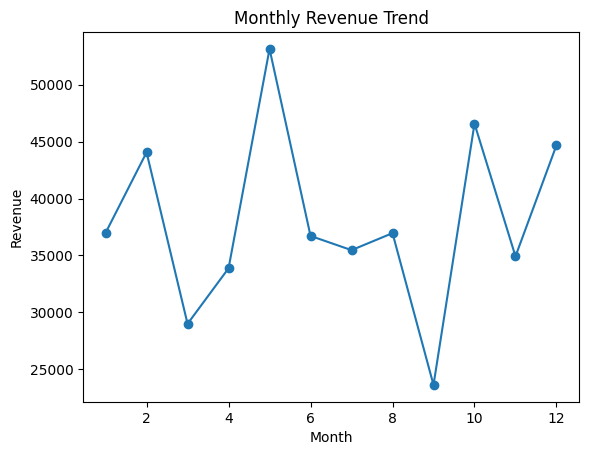

In [20]:
monthly_sales = df.groupby(df['Date'].dt.month)['Revenue'].sum()

monthly_sales.plot(marker='o', title='Monthly Revenue Trend')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

**Performance**

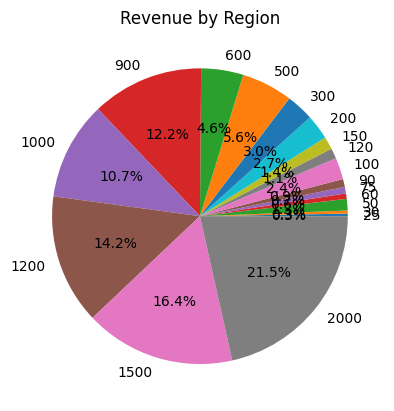

In [28]:
region_sales = df.groupby('Total Amount')['Revenue'].sum()

region_sales.plot(kind='pie', autopct='%0.00001f%%', title='Revenue by Region')
plt.ylabel("")
plt.show()


**Summary**

In [33]:
summary = pd.DataFrame({
    "Metric": ["Total Revenue", "Average Order Value", "Total Amount"],
    "Value": [total_revenue, avg_order_value, top_region]
})

summary

,Metric,Value
0,Total Revenue,456000.0
1,Average Order Value,456.0
2,Total Amount,2000.0
